In [76]:
pip install twitterscraper

Note: you may need to restart the kernel to use updated packages.


# I am using the below Libraries to perform all operations indicated in ICA2 and ICA3

In [77]:
from twitter_scraper import get_tweets
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import regexp_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,SnowballStemmer




# Extracting Top 10 tweets

In order to Increase the clustering Area and the density of the cluster, I am displaying 10 pages of tweets for better visibility of each Individual clusters. 

In [78]:
text1=[]
for tweet in get_tweets('twitter', pages=10):
         text1.append(tweet['text'])

In [79]:
text1

['Take us with you, @NASAPersevere',
 'Who wants to be transported off this planet?',
 'Like for liftoff! #CountdownToMars pic.twitter.com/yLe331pHfY',
 'You may be unable to Tweet or reset your password while we review and address this incident.',
 'Slide into those DMs without clicking away from your timeline.\n\nRolling out on web. pic.twitter.com/BdaeYoyPu2',
 'You can have an edit button when everyone wears a mask',
 'Good news and bad news: \n\n2020 is half over',
 ' Oakland\n @YoliZama pic.twitter.com/lcGDLzAJIn',
 ' New York City\n @Afrikkana95 pic.twitter.com/tEfs27p7xu',
 ' Chicago\n @JoshuaKissi pic.twitter.com/ZeD3XvJUbX',
 ' Philadelphia\n @Imani_Barbarin pic.twitter.com/ZRDUipsu38',
 ' Louisville\n @itsbarrrrett pic.twitter.com/Vk4vDeuAqb',
 ' Atlanta\n @BerniceKing pic.twitter.com/83upyVnwIS',
 ' Minneapolis\n @FredTJoseph pic.twitter.com/lNTOkyguG1',
 'Juneteenth is a celebration. It’s about our freedom. And within that freedom is our joy.\n\n#BlackJoy is a form of resi

# I am now performing the process of Text/Tweet CLEANING

In this Step I perform the Following Operations:
1) Remove punctuations
2) Tokenization - Converting a sentence into list of words
3) Remove stopwords
4) Lammetization/stemming - Tranforming any form of a word to its root word

In [80]:
import re
for i in range(len(text1)):
    text1[i] = text1[i].lower()
    text1[i] = re.sub('[^a-z]',' ',text1[i])

In [81]:
text1

['take us with you   nasapersevere',
 'who wants to be transported off this planet ',
 'like for liftoff   countdowntomars pic twitter com yle   phfy',
 'you may be unable to tweet or reset your password while we review and address this incident ',
 'slide into those dms without clicking away from your timeline   rolling out on web  pic twitter com bdaeyoypu ',
 'you can have an edit button when everyone wears a mask',
 'good news and bad news         is half over',
 ' oakland   yolizama pic twitter com lcgdlzajin',
 ' new york city   afrikkana   pic twitter com tefs  p xu',
 ' chicago   joshuakissi pic twitter com zed xvjubx',
 ' philadelphia   imani barbarin pic twitter com zrduipsu  ',
 ' louisville   itsbarrrrett pic twitter com vk vdeuaqb',
 ' atlanta   berniceking pic twitter com   upyvnwis',
 ' minneapolis   fredtjoseph pic twitter com lntokygug ',
 'juneteenth is a celebration  it s about our freedom  and within that freedom is our joy    blackjoy is a form of resistance  pic t

In [82]:
stop = stopwords.words('english')
def sw(file):
    file=[word for word in str(file).split() if word not in stop]
    return "  ".join(file)

In [83]:
for i in range(len(text1)):
    text1[i]=sw(text1[i])

# I am now applying the LDA(Latent Dirichlet Algorithm). The LDA is a topic model which generates topics based on word frequency from a set of documents. 
Steps Invloved before and during the usage of LDA are :

1) Tokenizing :converting a document to its atomic elements
2) Stopping : removing meaningless words
3) Stemming : merging words that are equivalent in meaning

In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vec = TfidfVectorizer()
DTM = vec.fit_transform(text1)
lda = LatentDirichletAllocation(n_components=5, max_iter=10, random_state=1234)
lda_ouput = lda.fit_transform(DTM)


# Similarity features



In [85]:
lda_ouput

array([[0.07370538, 0.07470621, 0.07522571, 0.70287487, 0.07348783],
       [0.07326437, 0.70623839, 0.07326553, 0.07396496, 0.07326675],
       [0.05609358, 0.05597239, 0.05599292, 0.05618843, 0.77575268],
       [0.05316139, 0.05296141, 0.05280046, 0.0528351 , 0.78824164],
       [0.81047261, 0.04725231, 0.04732494, 0.04781384, 0.0471363 ],
       [0.06188698, 0.06188703, 0.06188805, 0.06188337, 0.75245458],
       [0.71936151, 0.07117406, 0.06982288, 0.06981732, 0.06982423],
       [0.06359194, 0.74554712, 0.06346471, 0.06392134, 0.06347489],
       [0.78617181, 0.0531743 , 0.05348711, 0.05394912, 0.05321765],
       [0.05947436, 0.7620473 , 0.05938306, 0.05970445, 0.05939083],
       [0.05934117, 0.05920745, 0.05928346, 0.05951737, 0.76265056],
       [0.05918725, 0.05910887, 0.05915546, 0.76339218, 0.05915624],
       [0.06319567, 0.06308789, 0.06315117, 0.74741364, 0.06315163],
       [0.06342578, 0.06322604, 0.74633878, 0.06367151, 0.06333788],
       [0.04692407, 0.81244689, 0.

# Dimension reduction using PCA

Dimensionality reduction involves reducing the number of input variables or columns in modeling data. When dealing with high dimensional data, it is often useful to reduce the dimensionality by projecting the data to a lower dimensional subspace

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_ouput = pca.fit(lda_ouput).transform(lda_ouput)

In [70]:
pca_ouput

array([[ 0.51690896,  0.01795015],
       [-0.23361606,  0.4688028 ],
       [-0.12516576, -0.03330833],
       [-0.12729897, -0.03387825],
       [-0.23790841, -0.4997144 ],
       [-0.12184651, -0.03224474],
       [-0.20921619, -0.42558711],
       [-0.2489651 ,  0.50576138],
       [-0.22991441, -0.48029839],
       [-0.25540342,  0.52130728],
       [-0.12315165, -0.03276408],
       [ 0.5839682 ,  0.02043297],
       [ 0.56628348,  0.01958195],
       [-0.17486969, -0.09005416],
       [-0.27460425,  0.56882978],
       [-0.25076973, -0.53149739],
       [-0.16960728, -0.08707501],
       [ 0.6809416 ,  0.02491211],
       [ 0.64688443,  0.02325733],
       [-0.13038421, -0.03503618],
       [-0.23473755, -0.49000607],
       [-0.15596282, -0.0775325 ],
       [-0.28418052,  0.59288433],
       [ 0.67378005,  0.02462363],
       [ 0.61058765,  0.02170362],
       [ 0.67356528,  0.02495112],
       [-0.19557941, -0.10271922],
       [-0.13902848, -0.03706732],
       [-0.1933281 ,

In [51]:
import pandas as pd
data=pd.DataFrame(pca_ouput)

In [52]:
data.head()

,0,1
0,0.516909,0.017950
1,-0.233616,0.468803
2,-0.125166,-0.033308
3,-0.127299,-0.033878
4,-0.237908,-0.499714


In [53]:
data.columns=['first','second']

In [54]:
data['label']=cluster_new.labels_

# KMEANS clustering Algorithm

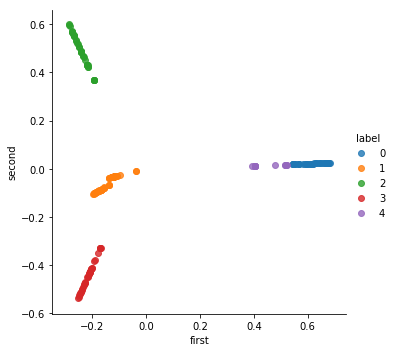

In [87]:
from sklearn.cluster import KMeans
cluster_new = KMeans(5)
cluster_new.fit(pca_ouput)
import seaborn as sb
sb.lmplot(x='first',y='second',hue = 'label',data=data,fit_reg=False,)

# SCENARIO 1 : CONCLUSION
It can thus be concluded, From the above cluster it is noted that the cluster indicates relevant tweets. However, it is also noted that this may/may not change depending on the tweets and type of tweets.

# SCENARIO 2: IMPORTING TWEETS FROM AN EXCEL FILE TO DEMONSTRATE THE WORKING OF PCA AND K- MEANS

Although the above graph satisfies requirements outlined in ICA 2 and ICA3 I will now using additional filters. I will now be displaying the tweet data by reading it from an Excel File.
I have just tried adding and using more features to learn, deploy and practice Python Programming and Data Mining.

In [93]:
import pandas as pd
text1=pd.read_excel('Tweet Excel file.xlsx')

In [94]:
text1.head()

,Tweet Number,Tweet
0,NaN,NaN
1,Tweet 1,@BillGates @bernardolayo @hewa_tele Hi Billy b...
2,Tweet 2,"RT @CatNamus: 37.) #SergeyBrin, owner of #Goog..."
3,Tweet 3,RT @AliBeckZeck: Why would #BillGates be calli...
4,Tweet 4,RT @JonnyQPublic: Can we just take a moment to...


In [95]:
text1.dropna(inplace=True)

In [96]:
text1

,Tweet Number,Tweet
1,Tweet 1,@BillGates @bernardolayo @hewa_tele Hi Billy b...
2,Tweet 2,"RT @CatNamus: 37.) #SergeyBrin, owner of #Goog..."
3,Tweet 3,RT @AliBeckZeck: Why would #BillGates be calli...
4,Tweet 4,RT @JonnyQPublic: Can we just take a moment to...
5,Tweet 5,RT @NickQuinlan9: @BillGates The world of the ...
6,Tweet 6,RT @OnEdgeOfWonder: THE SERIES TOO HOT FOR YOU...
7,Tweet 7,@Mrdeeds1111 @DougDerby Hey @BillGates you do ...
8,Tweet 8,@BillGates I’ll shoot chicken grease up my arm...
9,Tweet 9,RT @NSkiF1j1: Appalled by the article in @NEJM...
10,Tweet 10,$MRNA should…RT @rix: Todavía hay gente con ...


# CLEANING THE TEXT DATA

In [97]:
text1.dropna(inplace=True)

In [98]:
import numpy as np
text1 = list(np.array(text1['Tweet']))

In [99]:
text1

['@BillGates @bernardolayo @hewa_tele Hi Billy boy, we see yooooou https://t.co/XuywBj5quA',
 'RT @CatNamus: 37.) #SergeyBrin, owner of #Google visited #JeffreyEpstein after his #ChildSexTrafficking conviction in 2011 at #LongBeach, C…',
 'RT @AliBeckZeck: Why would #BillGates be calling #COVID “Pandemic 1” unless he knows something we don’t know? Obviously he’s got something…',
 'RT @JonnyQPublic: Can we just take a moment to thank #billgates for stepping up and paying for free #Coronavirus tests during this #plandem…',
 'RT @NickQuinlan9: @BillGates The world of the Satanic Elite, like Ghislaine, Oprah, Ellen DeGeneres, Obama, Clintons--is crumbling. When al…',
 'RT @OnEdgeOfWonder: THE SERIES TOO HOT FOR YOUTUBE  Billuminati Gates[P1] Epstein, Eugenics &amp; The Lolita Express 🛩👉🏻 https://t.co/T…',
 '@Mrdeeds1111 @DougDerby Hey @BillGates you do realize how much outrage and anger that has built up &amp; you have cause… https://t.co/81Sce4noaD',
 '@BillGates I’ll shoot chicken grease

In [100]:
import re
for i in range(len(text1)):
    print(text1[i])
    text1[i] = text1[i].lower()
    text1[i] = re.sub('[^a-z]',' ',text1[i])

@BillGates @bernardolayo @hewa_tele Hi Billy boy, we see yooooou https://t.co/XuywBj5quA
RT @CatNamus: 37.) #SergeyBrin, owner of #Google visited #JeffreyEpstein after his #ChildSexTrafficking conviction in 2011 at #LongBeach, C…
RT @AliBeckZeck: Why would #BillGates be calling #COVID “Pandemic 1” unless he knows something we don’t know? Obviously he’s got something…
RT @JonnyQPublic: Can we just take a moment to thank #billgates for stepping up and paying for free #Coronavirus tests during this #plandem…
RT @NickQuinlan9: @BillGates The world of the Satanic Elite, like Ghislaine, Oprah, Ellen DeGeneres, Obama, Clintons--is crumbling. When al…
RT @OnEdgeOfWonder: THE SERIES TOO HOT FOR YOUTUBE  Billuminati Gates[P1] Epstein, Eugenics &amp; The Lolita Express 🛩👉🏻 https://t.co/T…
@Mrdeeds1111 @DougDerby Hey @BillGates you do realize how much outrage and anger that has built up &amp; you have cause… https://t.co/81Sce4noaD
@BillGates I’ll shoot chicken grease up my arm before I take a bil

In [101]:
text1

[' billgates  bernardolayo  hewa tele hi billy boy  we see yooooou https   t co xuywbj qua',
 'rt  catnamus        sergeybrin  owner of  google visited  jeffreyepstein after his  childsextrafficking conviction in      at  longbeach  c ',
 'rt  alibeckzeck  why would  billgates be calling  covid  pandemic    unless he knows something we don t know  obviously he s got something ',
 'rt  jonnyqpublic  can we just take a moment to thank  billgates for stepping up and paying for free  coronavirus tests during this  plandem ',
 'rt  nickquinlan    billgates the world of the satanic elite  like ghislaine  oprah  ellen degeneres  obama  clintons  is crumbling  when al ',
 'rt  onedgeofwonder  the series too hot for youtube  billuminati gates p   epstein  eugenics  amp  the lolita express     https   t co t ',
 ' mrdeeds      dougderby hey  billgates you do realize how much outrage and anger that has built up  amp  you have cause  https   t co   sce noad',
 ' billgates i ll shoot chicken grease

In [102]:
stop = stopwords.words('english')
def sw(file):
    file=[word for word in str(file).split() if word not in stop]
    return "  ".join(file)

In [103]:
for i in range(len(text1)):
    text1[i]=sw(text1[i])

In [104]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vec = TfidfVectorizer()
DTM = vec.fit_transform(text1)
lda = LatentDirichletAllocation(n_components=5, max_iter=10, random_state=1234)
lda_ouput = lda.fit_transform(DTM)

# SIMILARITY FEATURES

In [105]:
lda_ouput

array([[0.04409579, 0.82345976, 0.04408641, 0.04418442, 0.04417361],
       [0.04857922, 0.04875674, 0.80538147, 0.04866756, 0.04861501],
       [0.04549019, 0.04566227, 0.04550816, 0.81781887, 0.0455205 ],
       [0.04562439, 0.04584656, 0.0456814 , 0.04592848, 0.81691917],
       [0.04167628, 0.04173659, 0.04169007, 0.83319788, 0.04169918],
       [0.04280096, 0.82854143, 0.0428068 , 0.0429327 , 0.0429181 ],
       [0.04162272, 0.04218526, 0.04161368, 0.04166822, 0.83291011],
       [0.05064748, 0.05086185, 0.05063938, 0.7970373 , 0.05081398],
       [0.04529623, 0.81857972, 0.04530343, 0.04553084, 0.04528978],
       [0.04077797, 0.83673512, 0.04078108, 0.04086219, 0.04084365]])

# Dimension reduction using PCA# Dimension reduction using PCA

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_ouput = pca.fit(lda_ouput).transform(lda_ouput)

In [107]:
pca_ouput

array([[-0.53199685, -0.12259794],
       [ 0.11756806,  0.15512497],
       [ 0.54083981, -0.34943025],
       [ 0.20122644,  0.6845007 ],
       [ 0.55228266, -0.36039449],
       [-0.53700517, -0.12435355],
       [ 0.20383965,  0.69989268],
       [ 0.52547875, -0.33448802],
       [-0.52711606, -0.1210643 ],
       [-0.54511728, -0.12718979]])

In [108]:
import pandas as pd
data=pd.DataFrame(pca_ouput)

In [109]:
data.head()

,0,1
0,-0.531997,-0.122598
1,0.117568,0.155125
2,0.540840,-0.349430
3,0.201226,0.684501
4,0.552283,-0.360394


In [110]:
data.columns=['first','second']

# K-MEANS CLUSTERING ALGORITHM

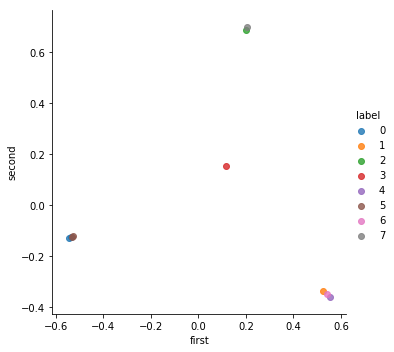

In [112]:
from sklearn.cluster import KMeans
cluster_new = KMeans(8)
cluster_new.fit(pca_ouput)
data['label']=cluster_new.labels_
import seaborn as sb
sb.lmplot(x='first',y='second',hue = 'label',data=data,fit_reg=False,)

# SCENARIO 2: CONCLUSION
    # It can thus be concluded, From the above cluster it is noted that the cluster indicates relevant tweets. 
    However, it is also noted that this may/may not change depending on the tweets and type of tweets.

# I am now adding additional Features, I will be adding a different theme for Jupyter Notebook.

In [113]:
pip install jupyterthemes

  Using cached https://files.pythonhosted.org/packages/8a/08/9dee6dfd7f2aad6c30282d55c8f495b4dc1e4747b4e2bdbeb80572ddf312/jupyterthemes-0.20.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/d2/665cda6614e3556eaeb7553a3a2963624c2e3bc9636777a1bb654b87b027/lesscpy-0.14.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [117]:
! jt -t monokai